# 08.ML_01_n년후예측.ipynb
## 2017 - 2012

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
sns.set_style('whitegrid')

In [4]:
# warning 숨기기
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [5]:
df = pd.read_csv("../Data/seoul_job.csv")
df.head()

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,30007,873,9,14,1.0
1,종로구,2014,27484,905,9,14,1.0
2,종로구,2015,27470,906,9,14,1.0
3,종로구,2016,26386,846,9,13,1.0
4,종로구,2017,25814,689,9,13,1.0


### 최근 5년의 data 뽑기
- 2017 ~ 2021

In [6]:
df = df[df['년도'] >= 2017]
df.head()

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
4,종로구,2017,25814,689,9,13,1.0
5,종로구,2018,24798,644,9,13,1.0
6,종로구,2019,23945,673,8,13,1.0
7,종로구,2020,25254,529,9,13,1.0
8,종로구,2021,24428,528,11,13,1.0


In [84]:
# from sklearn.cluster import KMeans

# # Target!!!!!!
# target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']

# df_temp = df.copy()

# #### Clustering!!!
# data_points = df[target_col].values
# km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
# df['cluster_id'] = km.labels_

# # # Feature, Target
# # target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
# # data = df[target_col].to_numpy()
# # target = df['cluster_id'].to_numpy()

# #### 0,1,2,3 --> 0 ~ 1
# df['cluster_id'] = df['cluster_id'] + 10
# df_temp = df.sort_values(by='전출인구', ascending=True)
# temp_list = df_temp['cluster_id'].unique()

# i = 3
# for temp in temp_list:
#     df['cluster_id'][df['cluster_id'] == temp] = i
#     i-=1
# df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
# df['cluster_id'].unique()

# #### ML 학습
# # Feature, Target
# target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
# data = df[target_col].to_numpy()
# target = df['cluster_id'].to_numpy()

# from sklearn.model_selection import train_test_split
# train_input, test_input, train_target, test_target = \
#     train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

# # RandomForest
# from sklearn.model_selection import cross_validate
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
# rf.fit(train_input, train_target)

# print("RandomForestRegressor Train score :", rf.score(test_input, test_target))

In [7]:
df

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
4,종로구,2017,25814,689,9,13,1.00
5,종로구,2018,24798,644,9,13,1.00
6,종로구,2019,23945,673,8,13,1.00
7,종로구,2020,25254,529,9,13,1.00
8,종로구,2021,24428,528,11,13,1.00
...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.33
221,강동구,2018,68933,2659,17,27,0.33
222,강동구,2019,67292,2437,17,27,0.33
223,강동구,2020,78271,2535,17,28,0.33


In [8]:
#### ML 학습
# Feature, Target
target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [9]:
train_input

array([[ 44809,   1772,      9,     14],
       [ 67634,   2512,     26,     24],
       [ 20873,    733,     10,     12],
       [ 47061,   1426,      9,     19],
       [ 56733,   2222,     15,     30],
       [ 93716,   2749,     53,     33],
       [101486,   4567,     25,     39],
       [ 78488,   3494,     16,     42],
       [ 56750,   1484,     12,     22],
       [ 78271,   2535,     17,     28],
       [ 35047,   1012,     10,     18],
       [ 57088,   1957,     13,     22],
       [ 61071,   2528,     26,     22],
       [ 58135,   1702,     15,     21],
       [ 74444,   2810,     19,     29],
       [ 55932,   2244,     10,     23],
       [ 35508,   1314,     10,     18],
       [ 64024,   2269,     12,     26],
       [ 34907,   1498,     10,     18],
       [ 72748,   2851,     17,     42],
       [ 50286,   1911,     10,     19],
       [ 98106,   2204,     51,     33],
       [113651,   3469,     25,     40],
       [ 41225,   1483,      7,     23],
       [ 37801, 

### LR 학습시키기

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print("Train score:", lr.score(test_input, test_target))

Train score: 0.776727076310517


In [11]:
lr.coef_

array([-5.33313664e-06, -2.35502080e-05, -2.58293633e-03, -2.13698880e-02])

In [12]:
pred_cluster = []

for i in range(len(df)):
    pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5]]]))

df['pred_cluster'] = pred_cluster
df

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
4,종로구,2017,25814,689,9,13,1.00,[1.024428322686501]
5,종로구,2018,24798,644,9,13,1.00,[1.0309065488745308]
6,종로구,2019,23945,673,8,13,1.00,[1.0373556947282485]
7,종로구,2020,25254,529,9,13,1.00,[1.031182912479831]
8,종로구,2021,24428,528,11,13,1.00,[1.0304457609009134]
...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.33,[0.30165199193904124]
221,강동구,2018,68933,2659,17,27,0.33,[0.4282329711095212]
222,강동구,2019,67292,2437,17,27,0.33,[0.442212794507963]
223,강동구,2020,78271,2535,17,28,0.33,[0.35998247889201673]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 4 to 224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   군구            125 non-null    object 
 1   년도            125 non-null    int64  
 2   전출인구          125 non-null    int64  
 3   출생아수          125 non-null    int64  
 4   산부인과의원수       125 non-null    int64  
 5   초등학교수         125 non-null    int64  
 6   cluster_id    125 non-null    float64
 7   pred_cluster  125 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 8.8+ KB


In [14]:
df['pred_cluster'] = df['pred_cluster'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 4 to 224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   군구            125 non-null    object 
 1   년도            125 non-null    int64  
 2   전출인구          125 non-null    int64  
 3   출생아수          125 non-null    int64  
 4   산부인과의원수       125 non-null    int64  
 5   초등학교수         125 non-null    int64  
 6   cluster_id    125 non-null    float64
 7   pred_cluster  125 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 8.8+ KB


### 그래프 연습

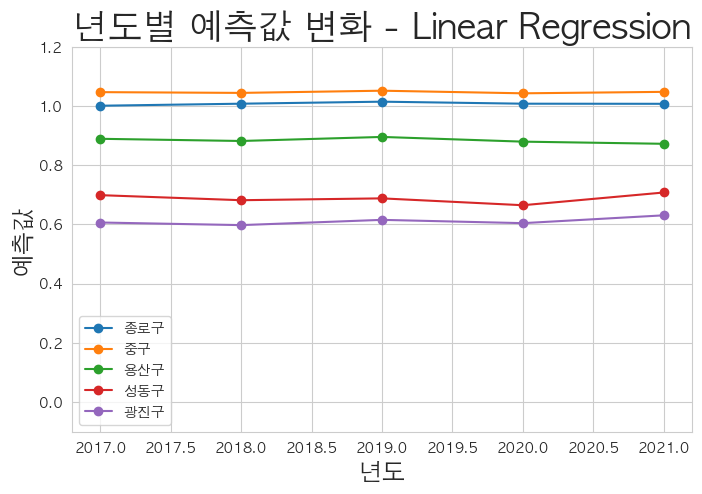

In [93]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

gungu = df["군구"].unique()[:5]
years = list(range(2017, 2022))

for i in range(len(gungu)):
    ax.plot(
        years,
        df[df['군구'] == gungu[i]]['pred_cluster'],
        marker='o',
        label=gungu[i],
    )

ax.legend(loc='best', fontsize=10)
plt.ylim(-0.1,1.20)
ax.set_title('년도별 예측값 변화 - Linear Regression', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)

plt.show()

### 그래프 함수화

In [ ]:
def plotFun(gungu):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1) #하나짜리 그래프
    years = list(range(2017, 2022))

    for i in range(len(gungu)):
        ax.plot(
            years,
            df[df['군구'] == gungu[i]]['pred_cluster'],
            marker='o',
            label=gungu[i],
        )

    ax.legend(loc='best', fontsize=10)
    plt.ylim(-0.20,1.20)
    ax.set_title('년도별 예측값 변화 - Linear Regression', size=25)
    ax.set_ylabel('예측값', fontsize=17)
    ax.set_xlabel('년도', fontsize=17)

    plt.show()

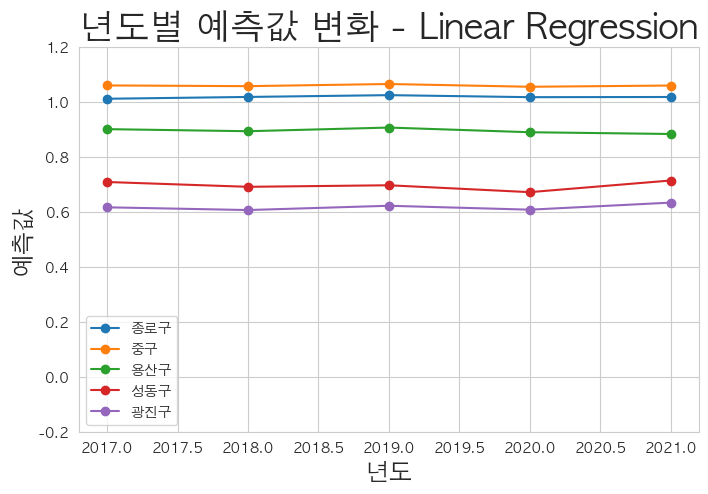

In [ ]:
gungu = df["군구"].unique()[:5]
plotFun(gungu)

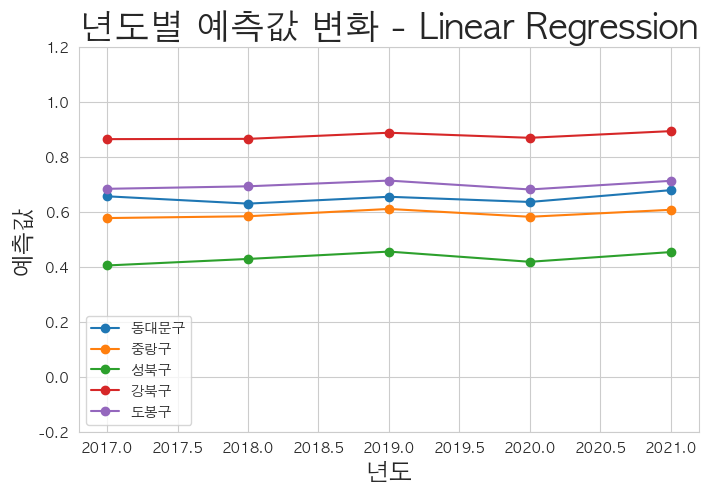

In [ ]:
gungu = df["군구"].unique()[5:10]
plotFun(gungu)

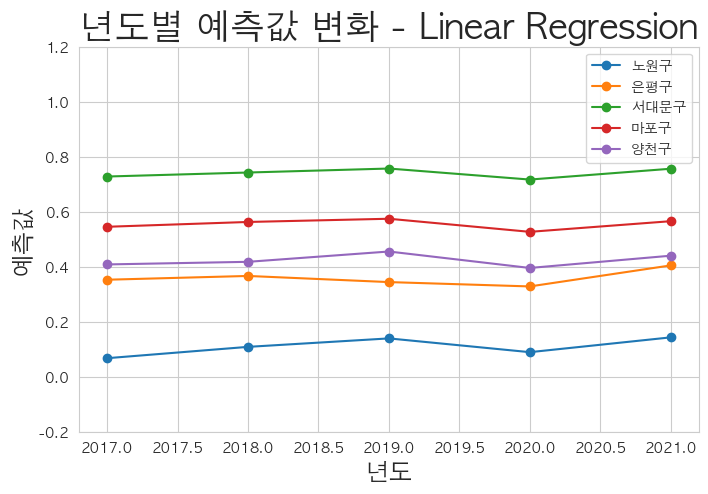

In [ ]:
gungu = df["군구"].unique()[10:15]
plotFun(gungu)

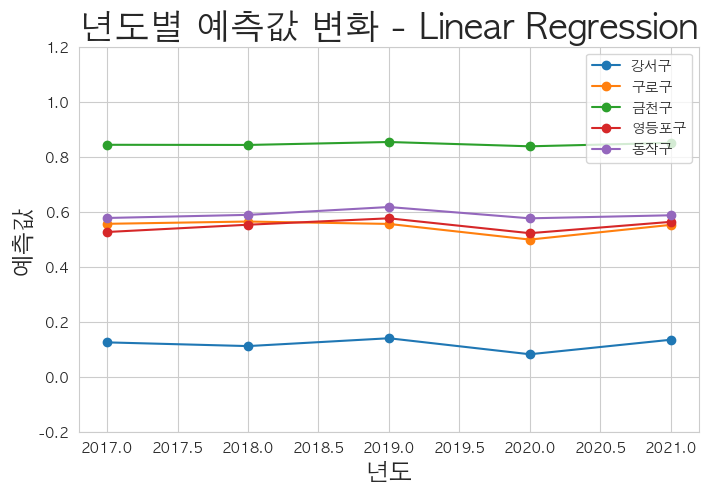

In [ ]:
gungu = df["군구"].unique()[15:20]
plotFun(gungu)

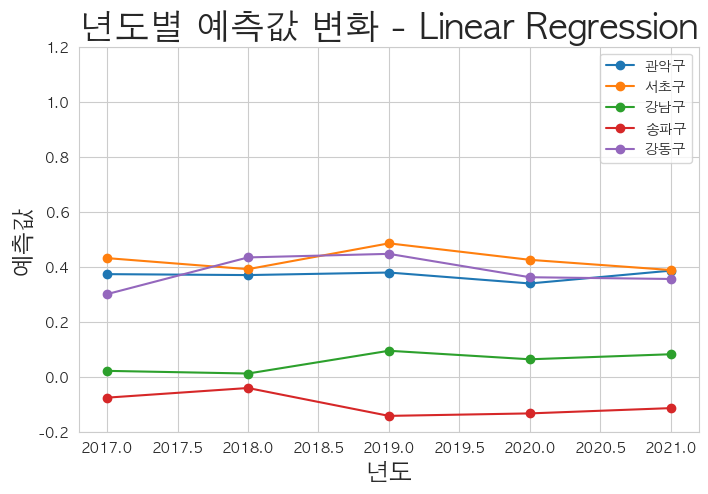

In [ ]:
gungu = df["군구"].unique()[20:25]
plotFun(gungu)

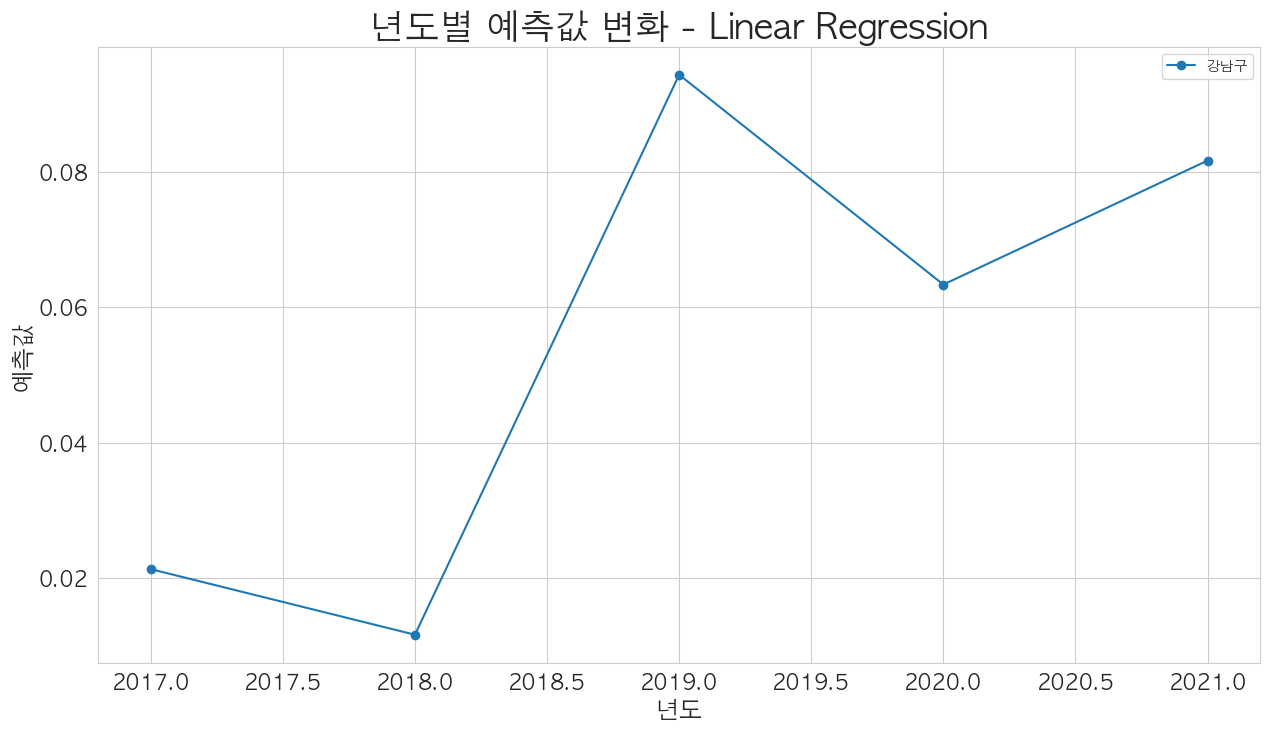

In [ ]:
# plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

# gungu = df["군구"].unique()[:5]
gungu = ['강남구']
# years = list(range(9))
years = list(range(2017, 2022))
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']
# colors = 'rainbow'

for i in range(len(gungu)):
    
    ax.plot(
        years,
        df[df['군구'] == gungu[i]]['pred_cluster'],
        marker='o',
        label=gungu[i],
        # color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('년도별 예측값 변화 - Linear Regression', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)

plt.show()

In [ ]:
# 강남구
df_ex = df[df['군구']=='강남구']
df_ex

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
202,강남구,2017,103367,3456,56,33,0.0,0.021310
203,강남구,2018,106802,2940,55,33,0.0,0.011612
204,강남구,2019,93716,2749,53,33,0.0,0.094415
205,강남구,2020,101582,2356,49,33,0.0,0.063388
206,강남구,2021,98106,2204,51,33,0.0,0.081722


## 강남구 연습

(-0.1, 1.1)

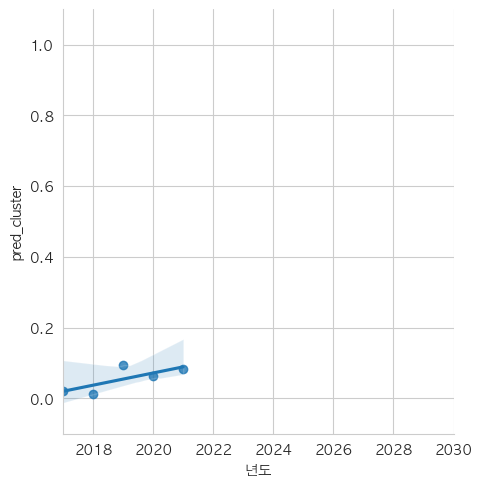

In [ ]:
sns.lmplot(
    x='년도',
    y='pred_cluster',
    data=df[df['군구']=='강남구']
)
plt.xlim(2017,2030)
plt.ylim(-0.1,1.1)

# pred_cluster ~ 년도 : 회귀식 학습시키기

In [ ]:
# Feature, Target
data = df_ex[['년도']].to_numpy()
target = df_ex['pred_cluster'].to_numpy()

# 회귀 예측
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(data, target)
print(lr2.coef_, lr2.intercept_)

[0.01725993] -34.79331403044952


In [ ]:
df_ex['년도']

202    2017
203    2018
204    2019
205    2020
206    2021
Name: 년도, dtype: int64

### 연습

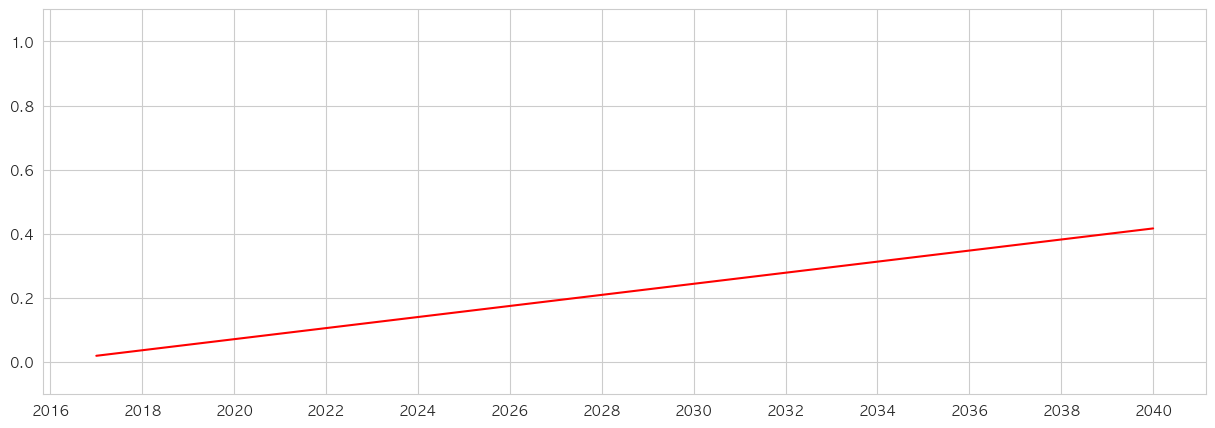

In [ ]:
plt.figure(figsize=(15,5))
plt.plot([2017, 2040], [(2017)*float(lr2.coef_)+float(lr2.intercept_), (2040)*float(lr2.coef_)+float(lr2.intercept_)], c='red')
# plt.xlim(2016, 2042)
plt.ylim(-0.1, 1.1)
plt.xticks(ticks=range(2016, 2042, 2))
plt.show()

# 통합

In [ ]:
gungu_list = df['군구'].unique()
gungu_list

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

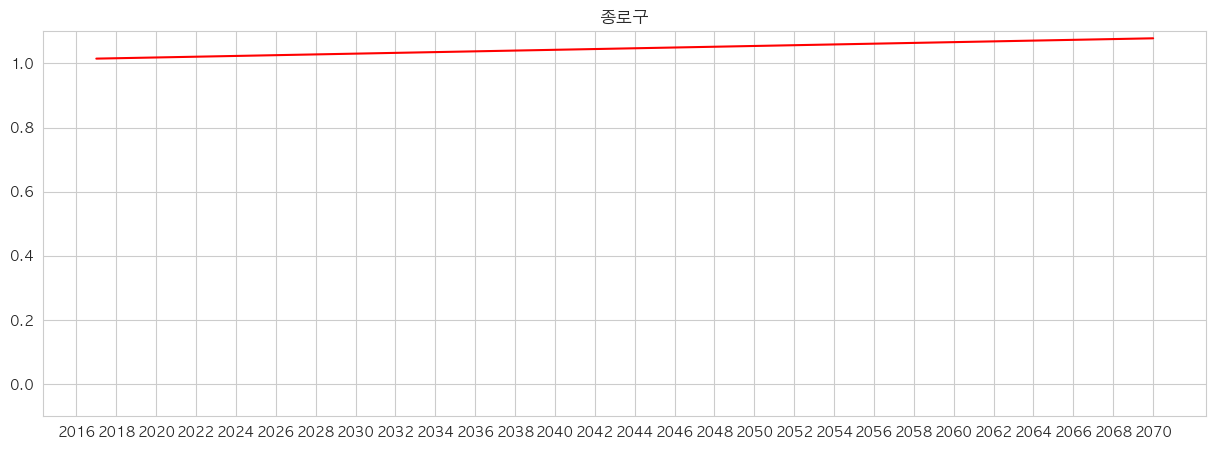

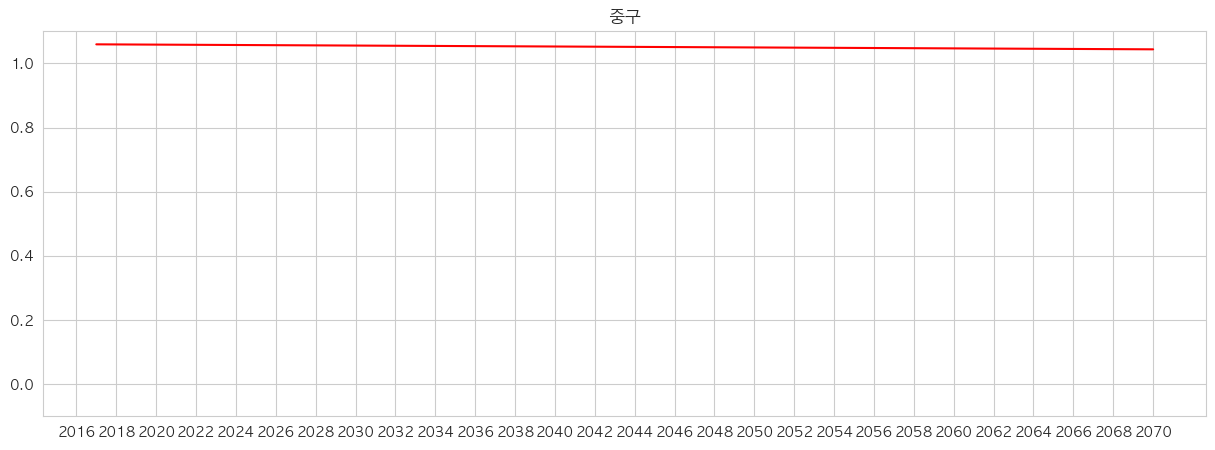

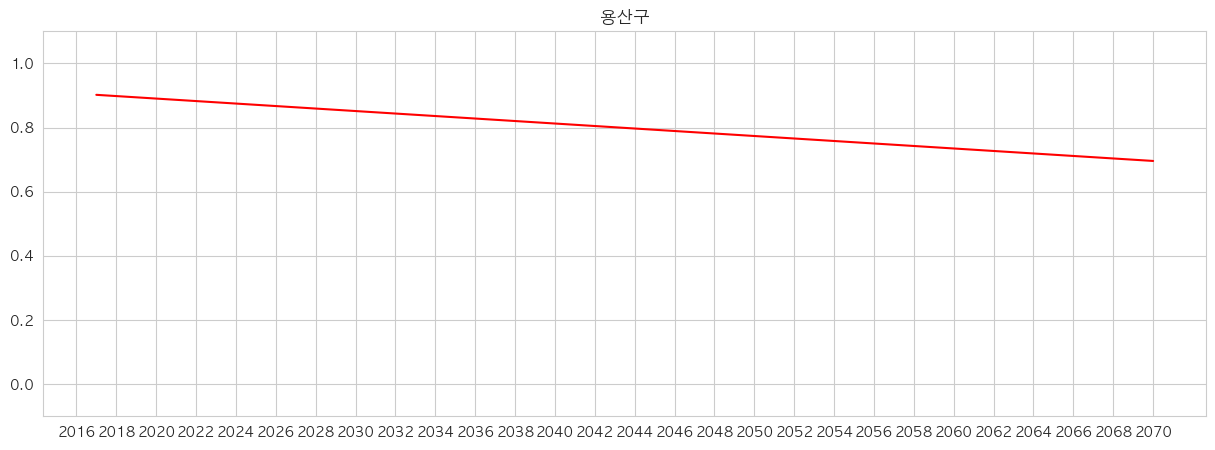

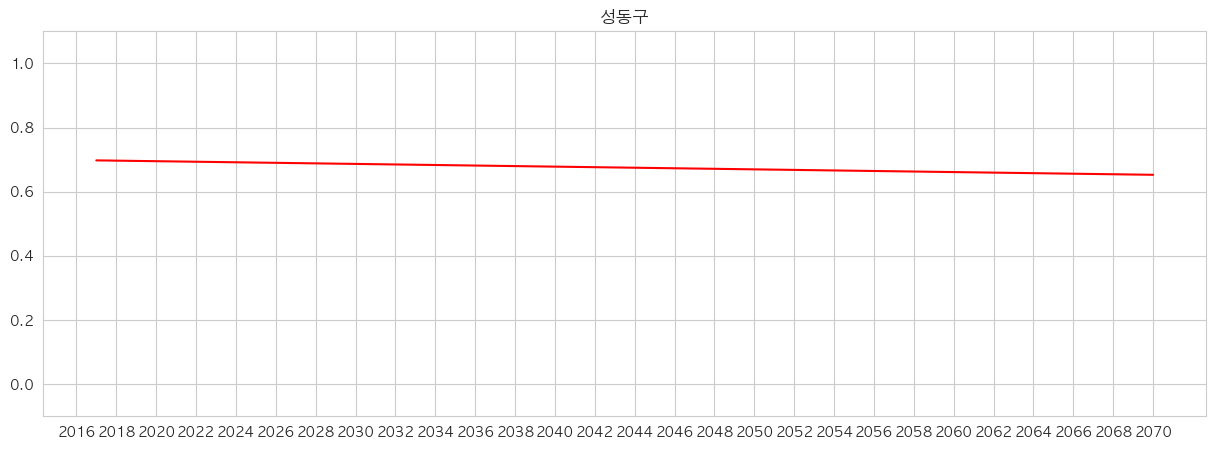

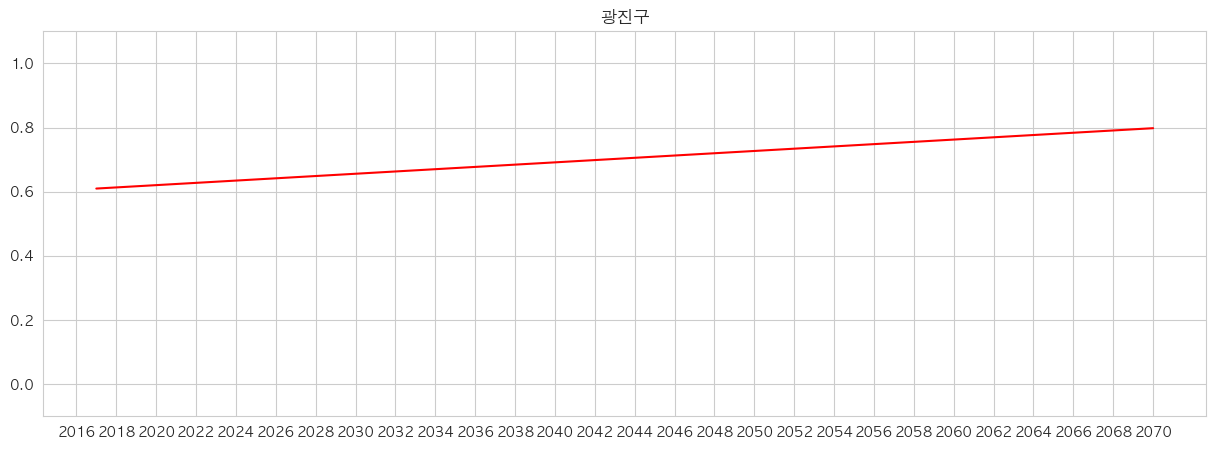

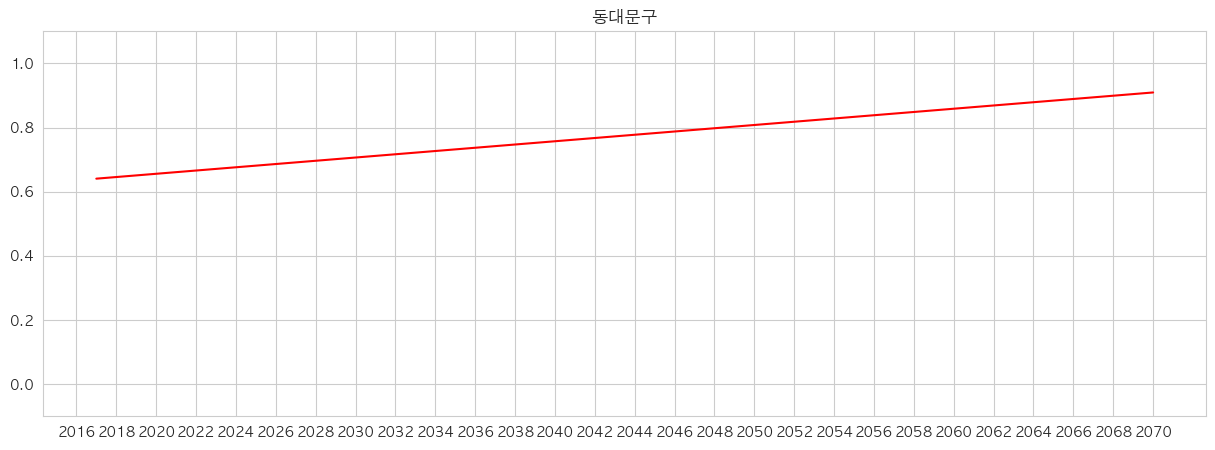

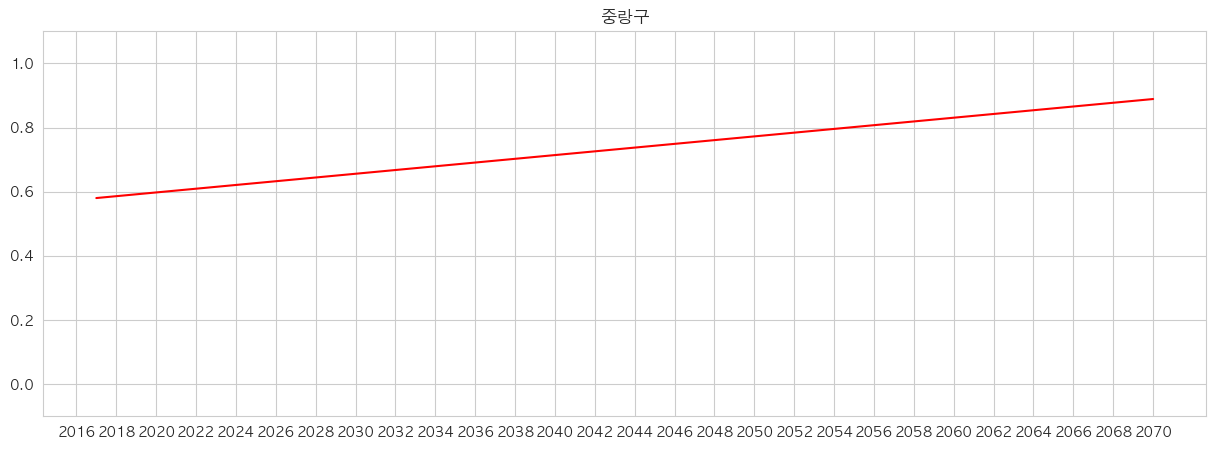

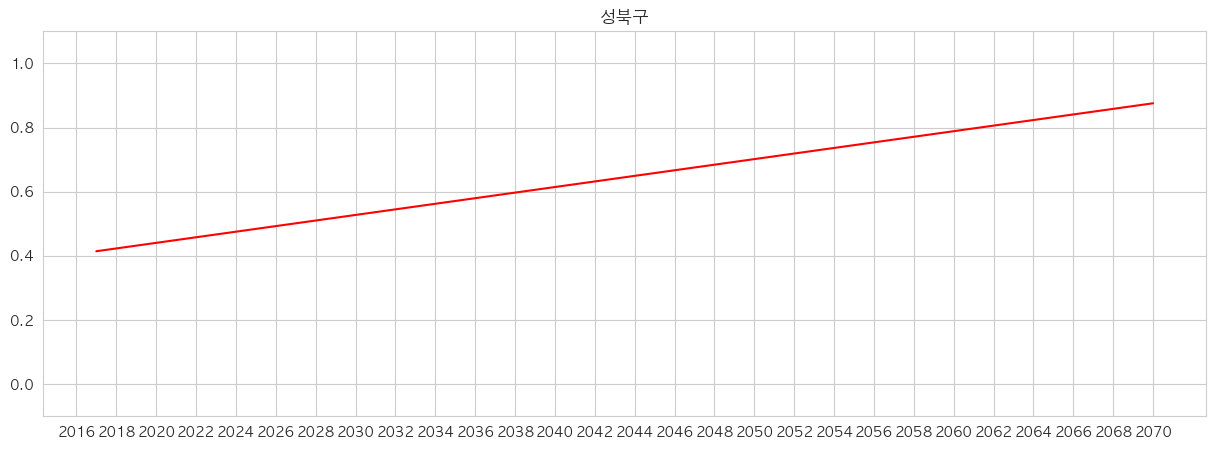

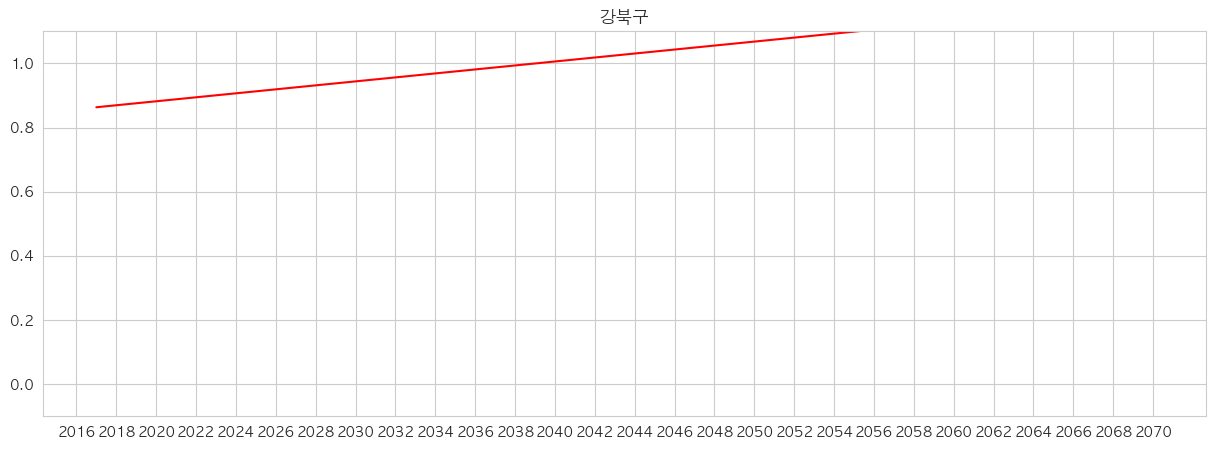

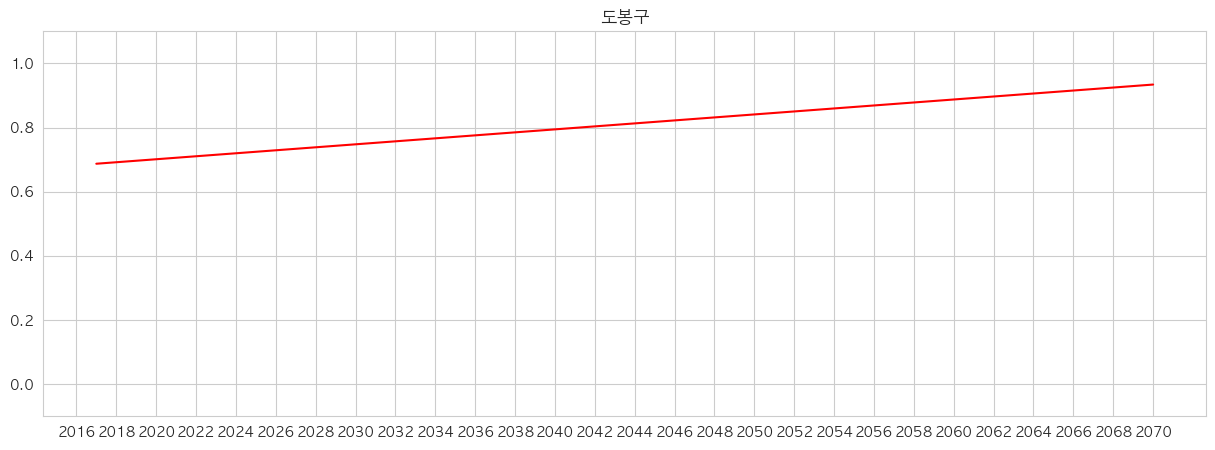

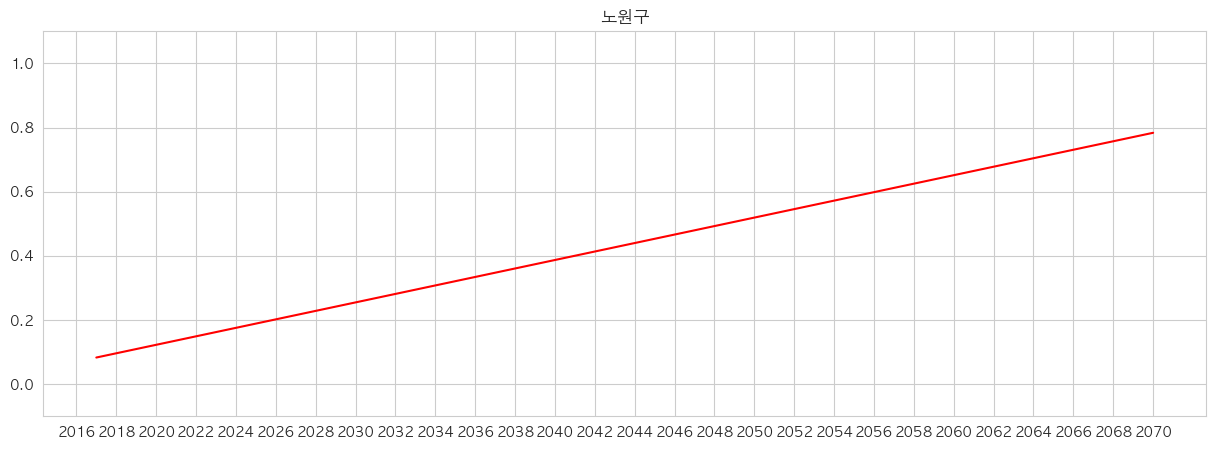

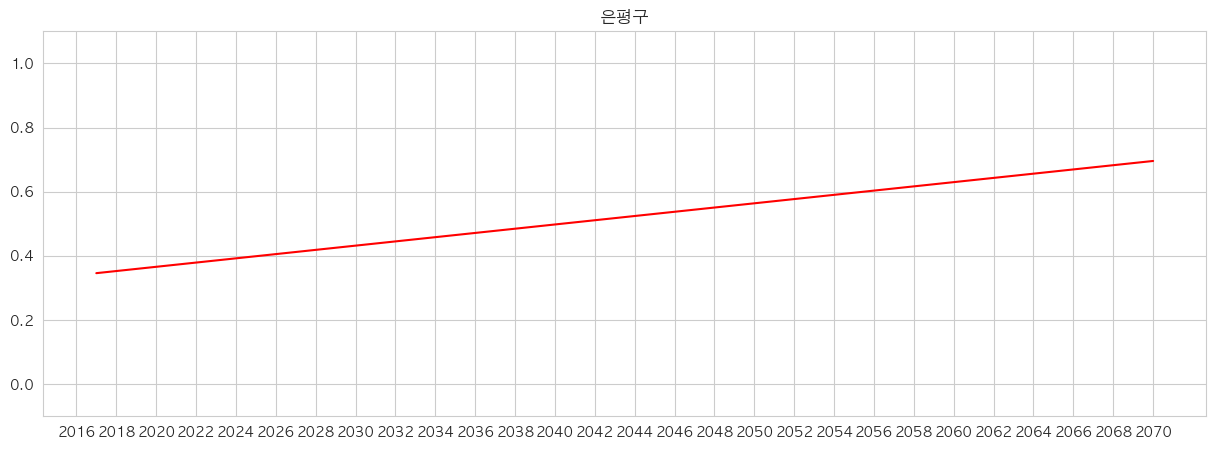

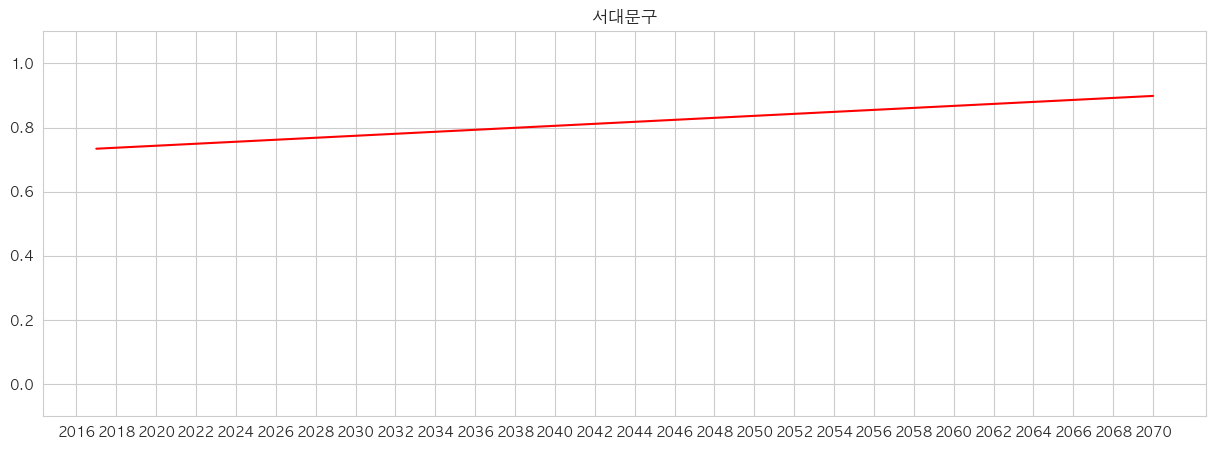

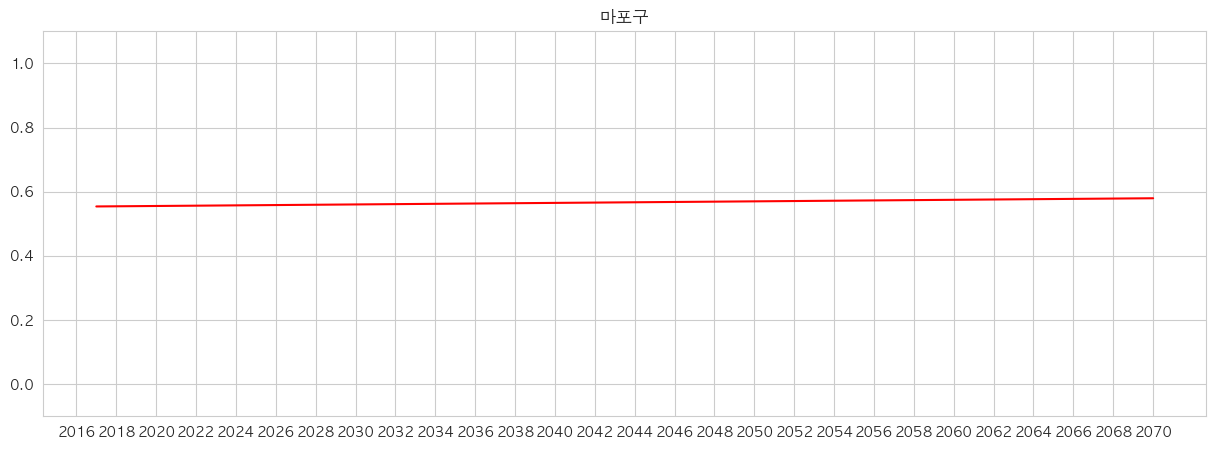

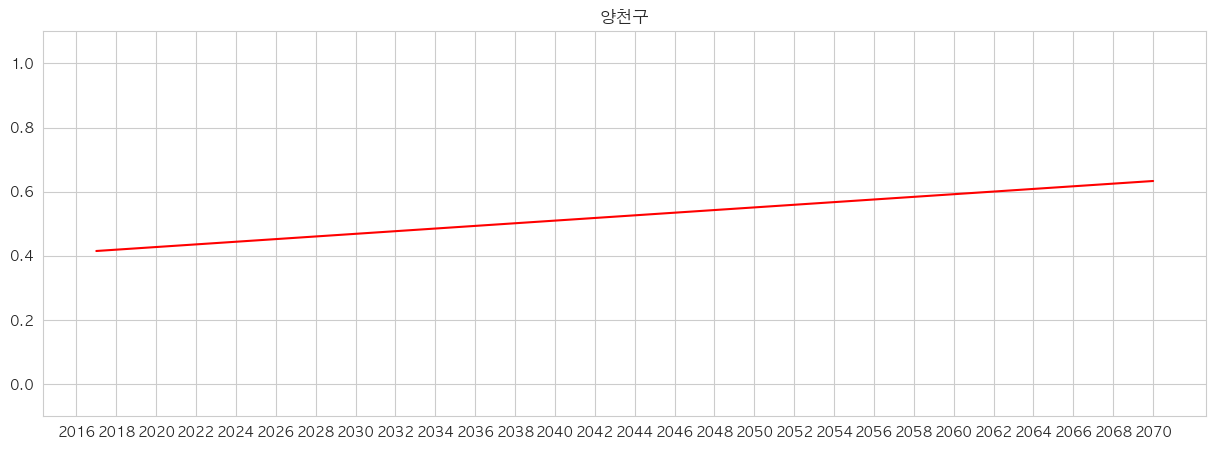

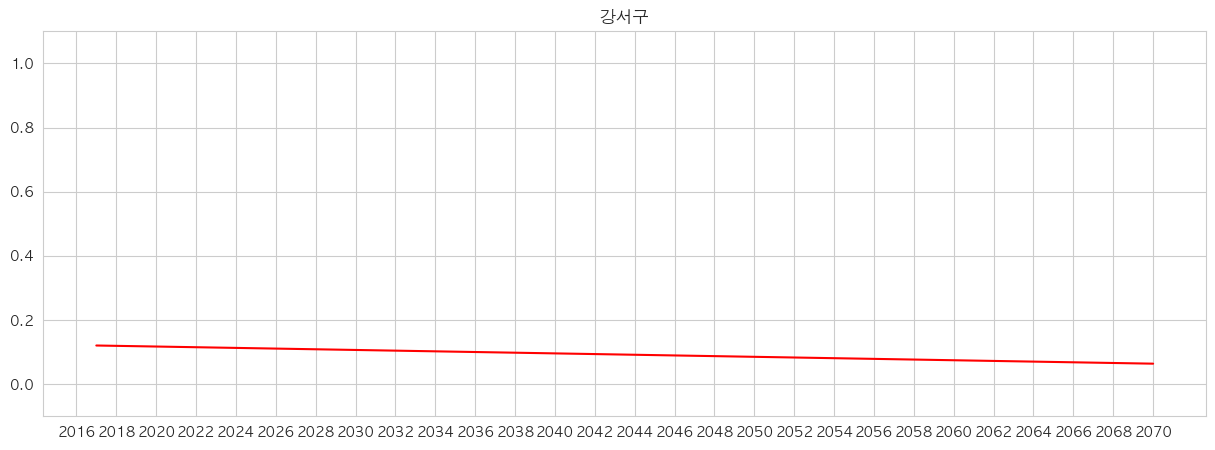

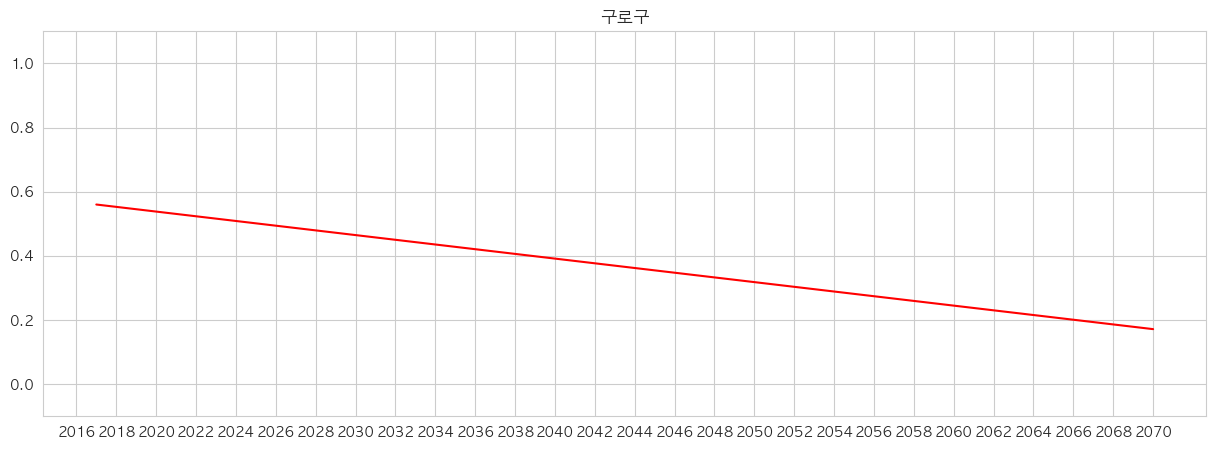

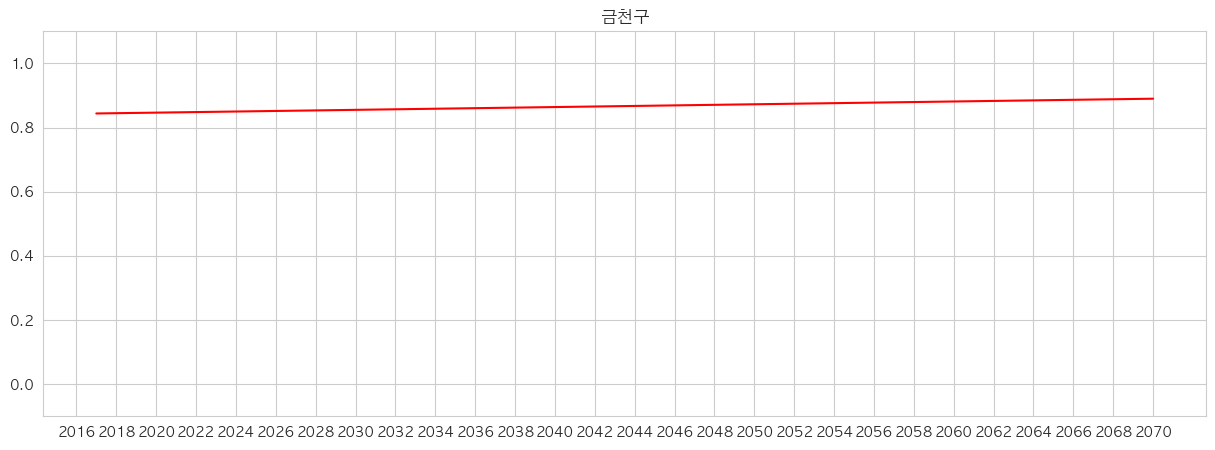

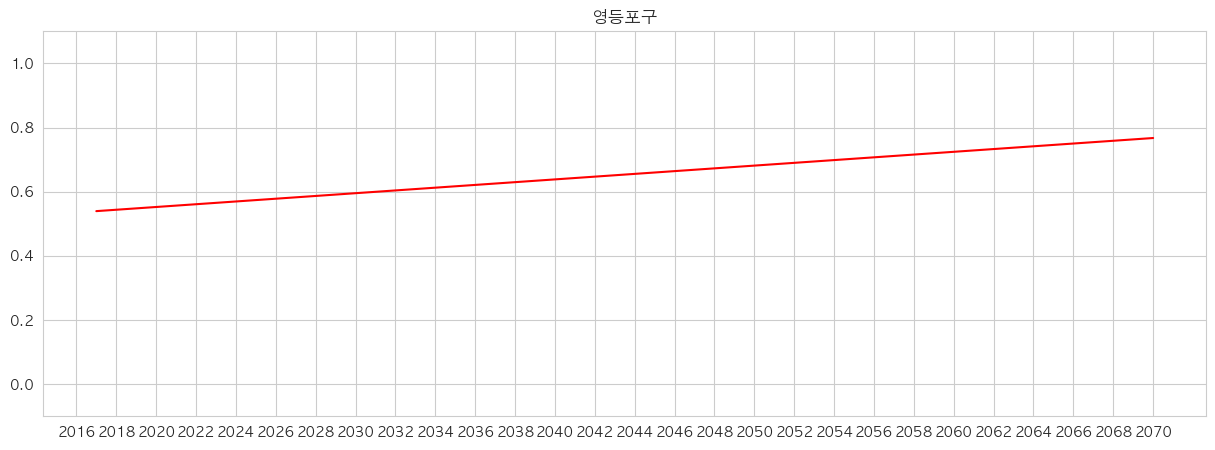

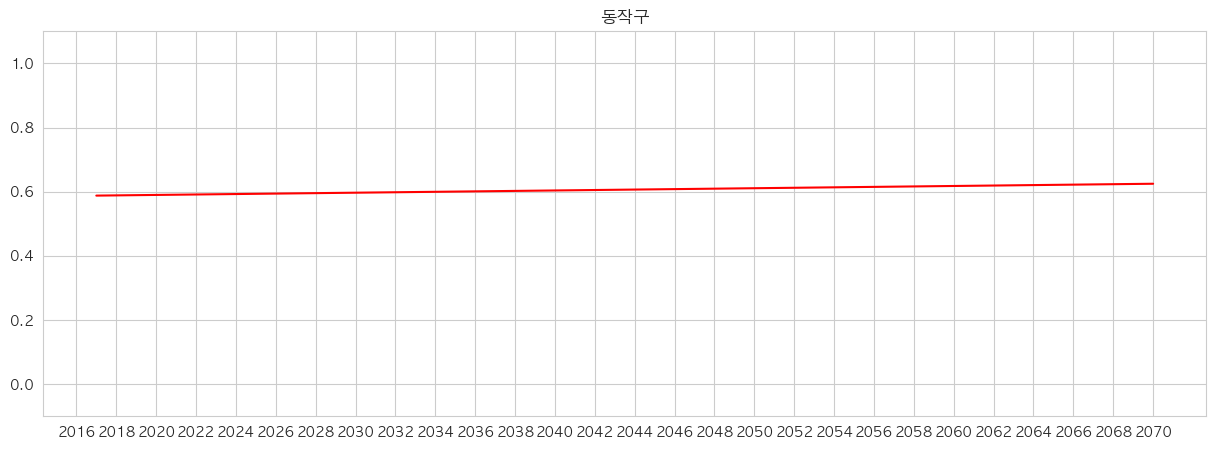

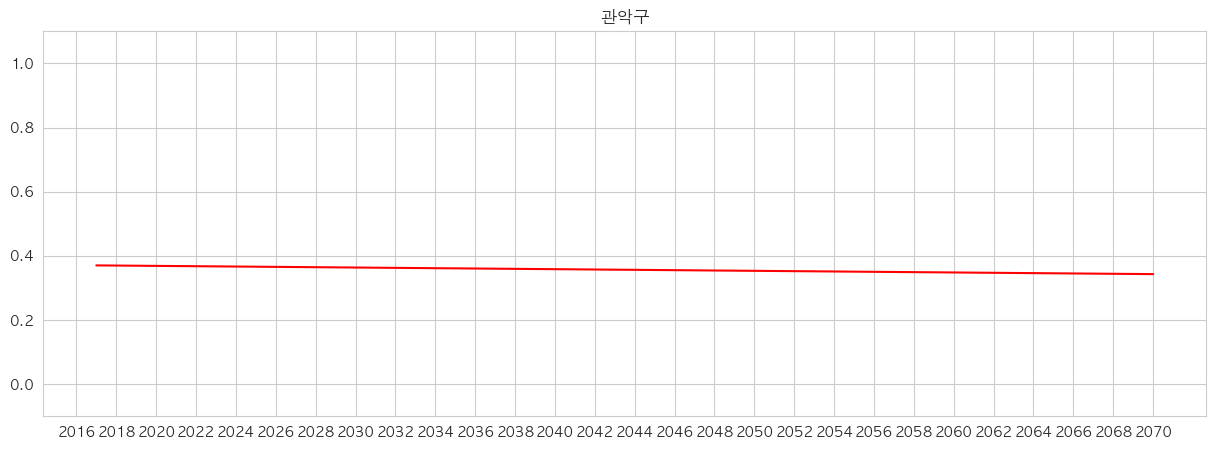

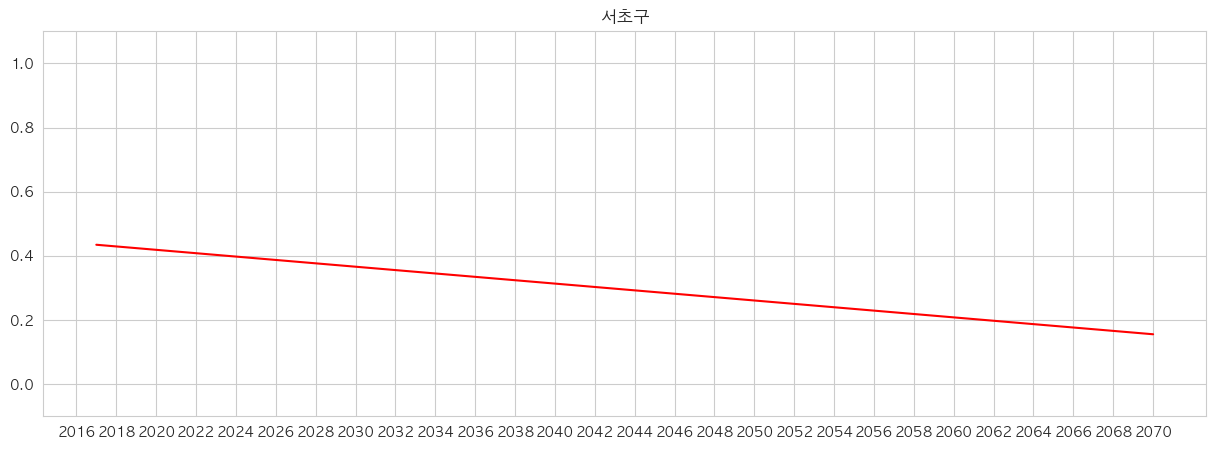

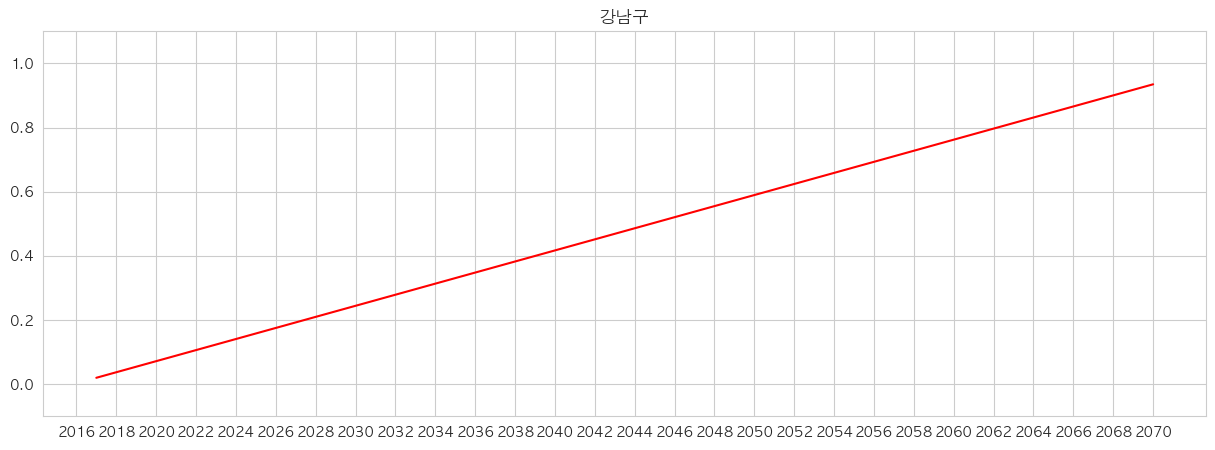

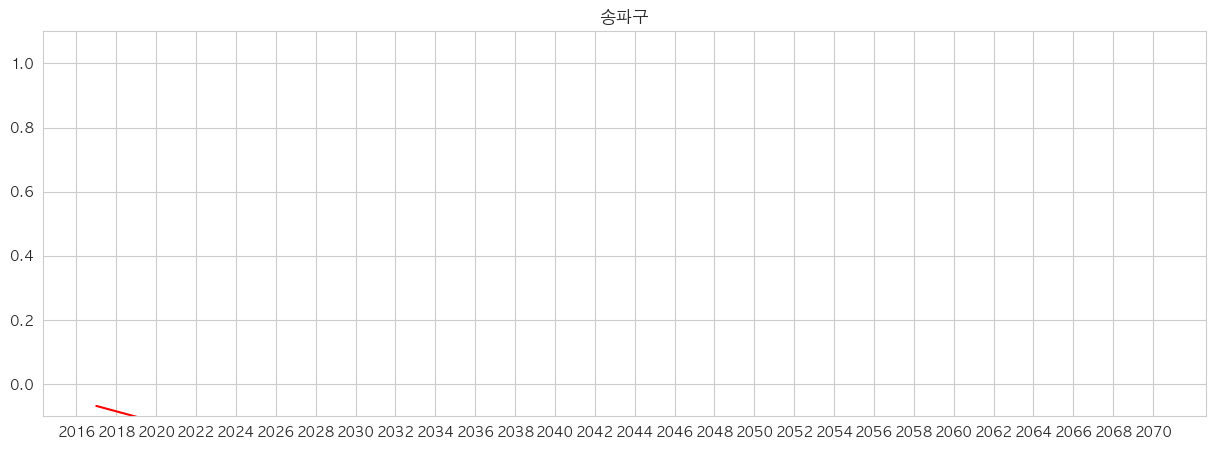

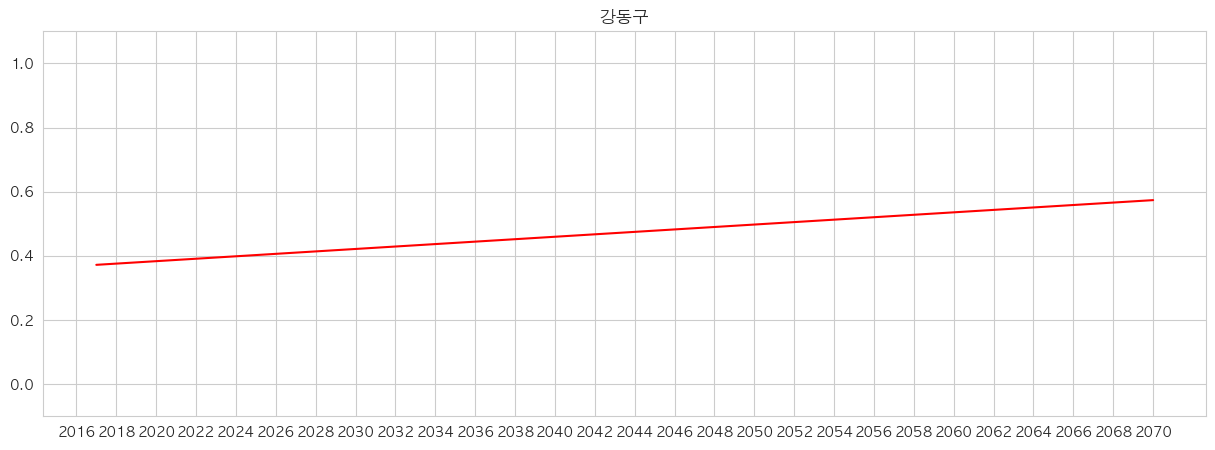

In [ ]:
################ 설정 값들
for gungu in gungu_list:
    # gungu = '강북구'
    year_max = 2070

    df_temp = df[df['군구']==gungu]

    # Feature, Target
    data = df_temp[['년도']].to_numpy()
    target = df_temp['pred_cluster'].to_numpy()

    # 회귀 예측
    from sklearn.linear_model import LinearRegression
    lr_temp = LinearRegression()
    lr_temp.fit(data, target)
    # print(lr_temp.coef_, lr_temp.intercept_)

    # 그래프 그리기
    plt.figure(figsize=(15,5))
    plt.title(gungu)
    plt.plot([2017, year_max], [(2017)*float(lr_temp.coef_)+float(lr_temp.intercept_), (year_max)*float(lr_temp.coef_)+float(lr_temp.intercept_)], c='red')
    # plt.xlim(2016, 2042)
    plt.ylim(-0.1, 1.1)
    plt.xticks(ticks=range(2016, year_max+1, 2))
    plt.show()

----
## DataFrame 과 ML 저장하기

In [ ]:
df

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
4,종로구,2017,25814,689,9,13,1.00,1.010790
5,종로구,2018,24798,644,9,13,1.00,1.017370
6,종로구,2019,23945,673,8,13,1.00,1.023920
7,종로구,2020,25254,529,9,13,1.00,1.016536
8,종로구,2021,24428,528,11,13,1.00,1.017181
...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.33,0.300371
221,강동구,2018,68933,2659,17,27,0.33,0.433831
222,강동구,2019,67292,2437,17,27,0.33,0.446800
223,강동구,2020,78271,2535,17,28,0.33,0.361771


In [ ]:
# DataFrame
df.to_csv("../Data/seoul_2017_2021_pred.csv", index=False)

In [ ]:
pd.read_csv("../Data/seoul_2017_2021_pred.csv").head()

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
0,종로구,2017,25814,689,9,13,1.0,1.010790
1,종로구,2018,24798,644,9,13,1.0,1.017370
2,종로구,2019,23945,673,8,13,1.0,1.023920
3,종로구,2020,25254,529,9,13,1.0,1.016536
4,종로구,2021,24428,528,11,13,1.0,1.017181


In [ ]:
# ML
import joblib
filename = "../Data/lr_seoul_2017_2021.h5"
joblib.dump(lr, filename)

['../Data/lr_seoul_2017_2021.h5']

In [ ]:
gungu_list = df['군구'].unique()
gungu_list[0]

'종로구'

----
----

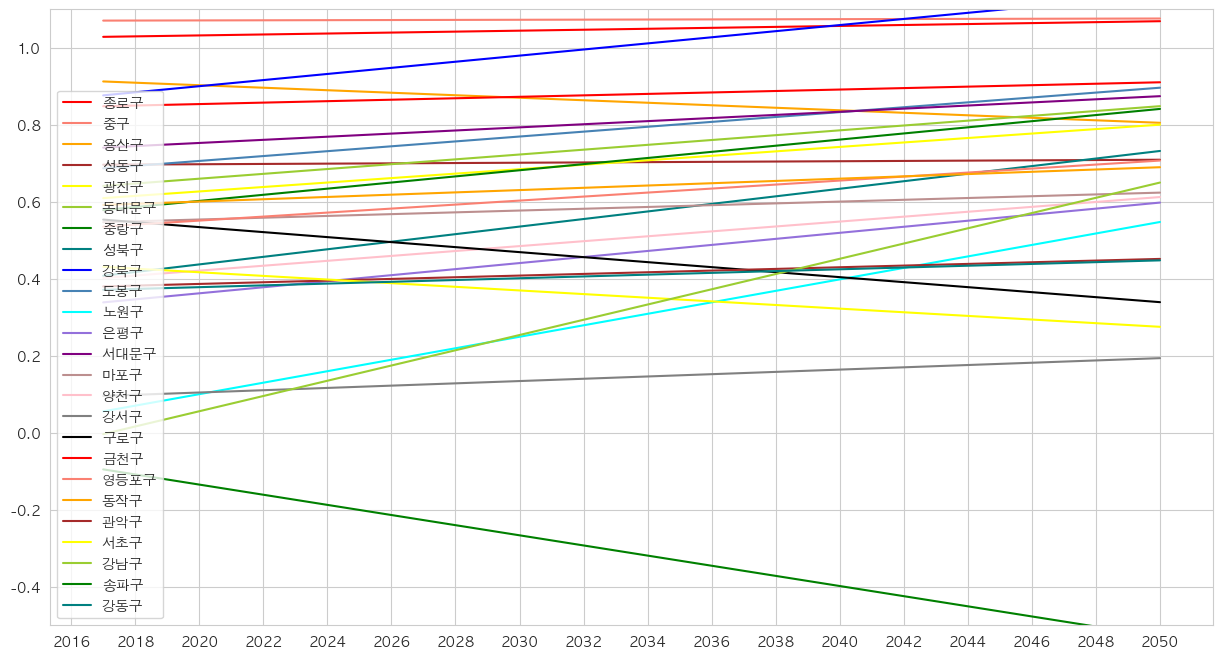

In [25]:
################ 설정 값들
gungu_list = df['군구'].unique()
year_max = 2050
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

# df_temp = df[df['군구']==gungu]

# # Feature, Target
# data = df_temp[['년도']].to_numpy()
# target = df_temp['pred_cluster'].to_numpy()

# # 회귀 예측
# from sklearn.linear_model import LinearRegression
# lr_temp = LinearRegression()
# lr_temp.fit(data, target)
# # print(lr_temp.coef_, lr_temp.intercept_)

colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black',\
          'red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal']
i = 0
for gungu in gungu_list:
    
    df_temp = df[df['군구']==gungu]

    # Feature, Target
    data = df_temp[['년도']].to_numpy()
    target = df_temp['pred_cluster'].to_numpy()

    # 회귀 예측
    from sklearn.linear_model import LinearRegression
    lr_temp = LinearRegression()
    lr_temp.fit(data, target)
    # print(lr_temp.coef_, lr_temp.intercept_)

    ax.plot([2017, year_max], 
            [(2017)*float(lr_temp.coef_)+float(lr_temp.intercept_), (year_max)*float(lr_temp.coef_)+float(lr_temp.intercept_)], 
            label = gungu,
            color = colors[i]
            # marker='o',
            # label=gungu_list[i],
            )
    i+=1

    # ax.plot(
    #     years,
    #     df[df['군구'] == gungu[i]]['pred_cluster'],
    #     marker='o',
    #     # label=gungu[i],
    #     # color=colors[i]
    # )

# # 그래프 그리기
# plt.figure(figsize=(15,5))
# plt.plot([2017, year_max], [(2017)*float(lr_temp.coef_)+float(lr_temp.intercept_), (year_max)*float(lr_temp.coef_)+float(lr_temp.intercept_)], c='red')
# # plt.xlim(2016, 2042)
plt.legend(loc='lower left', fontsize=10)
plt.ylim(-0.5, 1.1)
plt.xticks(ticks=range(2016, year_max+1, 2))
plt.show()



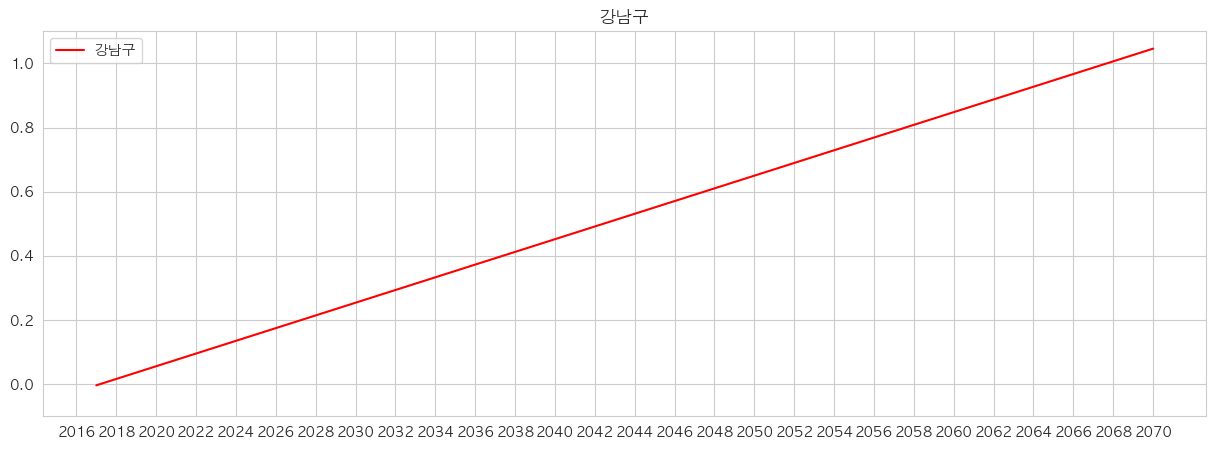

In [18]:
gungu = '강남구'

year_max = 2070

df_temp = df[df['군구']==gungu]

# Feature, Target
data = df_temp[['년도']].to_numpy()
target = df_temp['pred_cluster'].to_numpy()

# 회귀 예측
from sklearn.linear_model import LinearRegression
lr_temp = LinearRegression()
lr_temp.fit(data, target)
# print(lr_temp.coef_, lr_temp.intercept_)

# 그래프 그리기
plt.figure(figsize=(15,5))
plt.title(gungu)
plt.plot([2017, year_max], [(2017)*float(lr_temp.coef_)+float(lr_temp.intercept_), (year_max)*float(lr_temp.coef_)+float(lr_temp.intercept_)], c='red', label='강남구')
plt.legend(loc='best')
# plt.xlim(2016, 2042)
plt.ylim(-0.1, 1.1)
plt.xticks(ticks=range(2016, year_max+1, 2))
plt.show()